In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [67]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
df = pd.read_csv('imdb-videogames.csv',index_col='Unnamed: 0')

In [69]:
df.head()

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20803 entries, 0 to 20802
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   url          20803 non-null  object 
 2   year         20536 non-null  float64
 3   certificate  7903 non-null   object 
 4   rating       11600 non-null  float64
 5   votes        11600 non-null  object 
 6   plot         20803 non-null  object 
 7   Action       20803 non-null  bool   
 8   Adventure    20803 non-null  bool   
 9   Comedy       20803 non-null  bool   
 10  Crime        20803 non-null  bool   
 11  Family       20803 non-null  bool   
 12  Fantasy      20803 non-null  bool   
 13  Mystery      20803 non-null  bool   
 14  Sci-Fi       20803 non-null  bool   
 15  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), object(5)
memory usage: 1.4+ MB


In [71]:
df.describe()

,year,rating
count,20536.000000,11600.000000
mean,2005.568611,7.047526
std,11.846028,1.235204
min,1952.000000,1.000000
25%,1997.000000,6.400000
50%,2008.000000,7.200000
75%,2016.000000,7.900000
max,2027.000000,9.700000


In [72]:
df['year'].isna().sum()

267

In [79]:
df['name'].duplicated().sum()

1089

In [80]:
df.drop_duplicates(subset=['name'], inplace=True)

In [81]:
df.head()

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [82]:
df.dropna(subset=["year"], inplace=True) 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454 entries, 0 to 20802
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         19454 non-null  object 
 1   url          19454 non-null  object 
 2   year         19454 non-null  float64
 3   certificate  7133 non-null   object 
 4   rating       10657 non-null  float64
 5   votes        10657 non-null  object 
 6   plot         19454 non-null  object 
 7   Action       19454 non-null  bool   
 8   Adventure    19454 non-null  bool   
 9   Comedy       19454 non-null  bool   
 10  Crime        19454 non-null  bool   
 11  Family       19454 non-null  bool   
 12  Fantasy      19454 non-null  bool   
 13  Mystery      19454 non-null  bool   
 14  Sci-Fi       19454 non-null  bool   
 15  Thriller     19454 non-null  bool   
dtypes: bool(9), float64(2), object(5)
memory usage: 1.4+ MB


In [84]:
df.certificate.fillna('Not Rated',inplace=True)

In [85]:
df.certificate.replace({'K-A':'E', 'EC':'E','GA':'E', 'CE':'T', '12':'T','PG-13':'T','MA-13':'T','G':'E', 'MA-17':'M','PG':'E','TV-MA':'M','TV-14':'T','Unrated':'Not Rated','Passed':'Not Rated','Approved':'Not Rated'}, inplace=True)

(array([ 2308.,     0.,  1529.,     0.,   756.,     0.,  2132.,     0.,
        12697.,    32.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

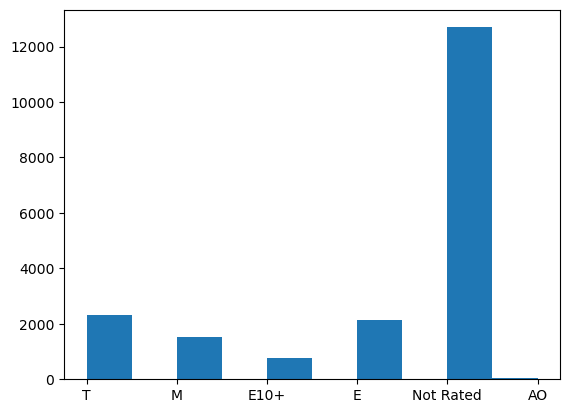

In [86]:
plt.hist(df.certificate.astype("category"))

(array([1.000e+00, 3.000e+00, 4.900e+01, 5.630e+02, 1.545e+03, 2.585e+03,
        3.487e+03, 3.456e+03, 5.946e+03, 1.819e+03]),
 array([1952. , 1959.5, 1967. , 1974.5, 1982. , 1989.5, 1997. , 2004.5,
        2012. , 2019.5, 2027. ]),
 <BarContainer object of 10 artists>)

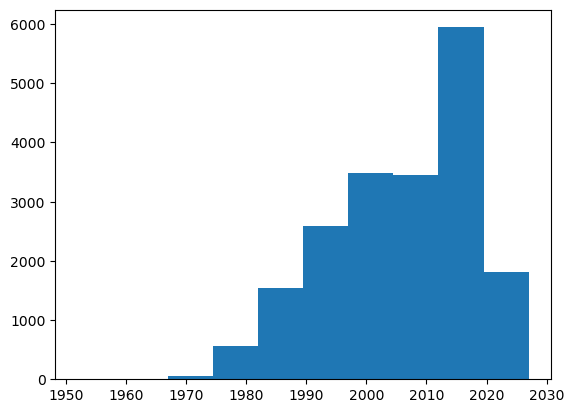

In [87]:
plt.hist(df.year)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19454 entries, 0 to 20802
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         19454 non-null  object 
 1   url          19454 non-null  object 
 2   year         19454 non-null  float64
 3   certificate  19454 non-null  object 
 4   rating       10657 non-null  float64
 5   votes        10657 non-null  object 
 6   plot         19454 non-null  object 
 7   Action       19454 non-null  bool   
 8   Adventure    19454 non-null  bool   
 9   Comedy       19454 non-null  bool   
 10  Crime        19454 non-null  bool   
 11  Family       19454 non-null  bool   
 12  Fantasy      19454 non-null  bool   
 13  Mystery      19454 non-null  bool   
 14  Sci-Fi       19454 non-null  bool   
 15  Thriller     19454 non-null  bool   
dtypes: bool(9), float64(2), object(5)
memory usage: 1.4+ MB


In [89]:
df_2024 = df[df['year']<=2024].reset_index(drop=True)

In [90]:
df_2024

,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19445,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,Not Rated,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
19446,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,Not Rated,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
19447,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,Not Rated,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
19448,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,Not Rated,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


In [91]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19450 entries, 0 to 19449
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         19450 non-null  object 
 1   url          19450 non-null  object 
 2   year         19450 non-null  float64
 3   certificate  19450 non-null  object 
 4   rating       10657 non-null  float64
 5   votes        10657 non-null  object 
 6   plot         19450 non-null  object 
 7   Action       19450 non-null  bool   
 8   Adventure    19450 non-null  bool   
 9   Comedy       19450 non-null  bool   
 10  Crime        19450 non-null  bool   
 11  Family       19450 non-null  bool   
 12  Fantasy      19450 non-null  bool   
 13  Mystery      19450 non-null  bool   
 14  Sci-Fi       19450 non-null  bool   
 15  Thriller     19450 non-null  bool   
dtypes: bool(9), float64(2), object(5)
memory usage: 1.2+ MB


In [92]:
df_2024.drop(['url','votes'],axis=1, inplace=True)

In [93]:
df_2024['rating'].median()

7.2

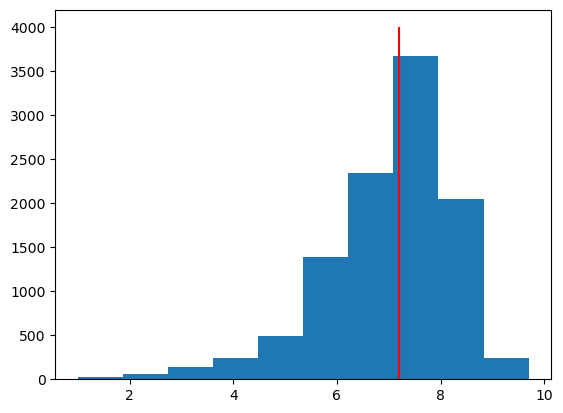

In [94]:
fig = plt.figure()
plt.hist(df_2024.rating)
plt.vlines(df_2024['rating'].median(), ymin=0, ymax= 4000, color='red')

In [95]:
median = df_2024['rating'].median()
df_2024['rating'].fillna(median, inplace=True)

Tf-idf plots as features

In [96]:
game_plots = df_2024['plot']
game_plots

0        When a new villain threatens New York City, Pe...
1        Amidst the decline of the Wild West at the tur...
2        Three very different criminals team up for a s...
3        After wiping out the gods of Mount Olympus, Kr...
4        Thrown back into the dangerous underworld he'd...
                               ...                        
19445                                           Add a Plot
19446    Joseph gets kidnapped and it's the player's jo...
19447    A tech support man who uses a drone to investi...
19448    A young teenage girl and the ghost of a dead m...
19449    Kidnapped by an insane man and dragged into a ...
Name: plot, Length: 19450, dtype: object

In [97]:

vectorizer_plot = TfidfVectorizer( max_features=10000, stop_words='english').fit(game_plots)
print(vectorizer_plot)

TfidfVectorizer(max_features=10000, stop_words='english')


In [98]:
game_plots_vectors = vectorizer_plot.transform(game_plots)

print("List of game plots vectors for the first 5 games:\n")
print(pd.DataFrame(game_plots_vectors.toarray()).head(5))

List of game plots vectors for the first 5 games:

   0     1     2     3     4     5     6     7     8     9     ...  9990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   9991  9992  9993  9994  9995  9996  9997  9998  9999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 10000 columns]


In [99]:
df_2024.drop('plot',axis=1, inplace=True)


In [100]:
df_2024.shape

(19450, 13)

In [101]:
tfidf_matrix_dense = game_plots_vectors.toarray()
print(tfidf_matrix_dense.shape)
print(pd.DataFrame(tfidf_matrix_dense).shape)
print(df_2024.shape)
#df_combined = pd.concat([df_2024, pd.DataFrame(tfidf_matrix_dense)], axis=1)

(19450, 10000)
(19450, 10000)
(19450, 13)


Create dummies for categorical variables

In [102]:
categorical_columns = [name for name in df_2024.columns if df_2024[name].dtype=='O']
categorical_columns = categorical_columns[1:]

print(f'There are {len(categorical_columns)} categorical features:\n')
print(", ".join(categorical_columns))

There are 1 categorical features:

certificate


In [103]:
video_games_df_dummy = pd.get_dummies(data=df_2024, columns=categorical_columns)
video_games_df_dummy.head(5)

,name,year,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,certificate_AO,certificate_E,certificate_E10+,certificate_M,certificate_Not Rated,certificate_T
0,Spider-Man,2018.0,9.2,True,True,False,False,False,True,False,False,False,0,0,0,0,0,1
1,Red Dead Redemption II,2018.0,9.7,True,True,False,True,False,False,False,False,False,0,0,0,1,0,0
2,Grand Theft Auto V,2013.0,9.5,True,False,False,True,False,False,False,False,False,0,0,0,1,0,0
3,God of War,2018.0,9.6,True,True,False,False,False,False,False,False,False,0,0,0,1,0,0
4,Uncharted 4: A Thief's End,2016.0,9.5,True,True,False,False,False,False,False,False,False,0,0,0,0,0,1


tf-idf names for input later 

In [104]:
game_names = video_games_df_dummy.name


In [105]:
vectorizer_name = TfidfVectorizer( max_features=10000, stop_words='english').fit(game_names)
print(vectorizer_name)

TfidfVectorizer(max_features=10000, stop_words='english')


In [106]:
game_name_vectors = vectorizer_name.transform(game_names)

print("List of game plots vectors for the first 5 games:\n")
print(pd.DataFrame(game_name_vectors.toarray()).head(5))

List of game plots vectors for the first 5 games:

   0     1     2     3     4     5     6     7     8     9     ...  9990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   9991  9992  9993  9994  9995  9996  9997  9998  9999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 10000 columns]


Standardize numerical features 

In [107]:

features = video_games_df_dummy.drop('name', axis=1)

scale = StandardScaler()
scaled_features = scale.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

scaled_features.head(5)

,year,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,certificate_AO,certificate_E,certificate_E10+,certificate_M,certificate_Not Rated,certificate_T
0,1.046918,2.303005,0.882159,1.019103,-0.308476,-0.205351,-0.401662,1.972778,-0.245662,-0.451951,-0.158389,-0.040595,-0.350869,-0.201099,-0.291887,-1.370893,2.725291
1,1.046918,2.849664,0.882159,1.019103,-0.308476,4.869713,-0.401662,-0.506900,-0.245662,-0.451951,-0.158389,-0.040595,-0.350869,-0.201099,3.425988,-1.370893,-0.366933
2,0.623988,2.631000,0.882159,-0.981255,-0.308476,4.869713,-0.401662,-0.506900,-0.245662,-0.451951,-0.158389,-0.040595,-0.350869,-0.201099,3.425988,-1.370893,-0.366933
3,1.046918,2.740332,0.882159,1.019103,-0.308476,-0.205351,-0.401662,-0.506900,-0.245662,-0.451951,-0.158389,-0.040595,-0.350869,-0.201099,3.425988,-1.370893,-0.366933
4,0.877746,2.631000,0.882159,1.019103,-0.308476,-0.205351,-0.401662,-0.506900,-0.245662,-0.451951,-0.158389,-0.040595,-0.350869,-0.201099,-0.291887,-1.370893,2.725291


Combine everything 

In [108]:
df_combined =  pd.concat([scaled_features, pd.DataFrame(tfidf_matrix_dense)], axis=1)
df_combined.columns = df_combined.columns.astype(str)

In [109]:
df_combined.shape

(19450, 10017)

In [110]:
model = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='auto').fit(df_combined)
print(model)

NearestNeighbors(metric='cosine', n_neighbors=11)


In [112]:
vg_distances, vg_indices = model.kneighbors(df_combined)

print("List of indexes and distances for the first 5 games:\n")
print(vg_indices[:5], "\n")
print(vg_distances[:5])

List of indexes and distances for the first 5 games:

[[   0   11   23   34  651 5091  217  580   22 2254  391]
 [   1   14 2825   87 2260  117 1202   46  180  220  958]
 [   2  121  239   40   17   48   26  606  265  116  223]
 [   3  287   28  641    7   10    8 1762   32   61   98]
 [   4  565 1060  468   20  290  342 6263 1790 1148 4250]] 

[[0.         0.04348018 0.04477483 0.04513235 0.04537494 0.04553039
  0.04626507 0.04634909 0.04662593 0.04892706 0.05009055]
 [0.         0.02647014 0.03798906 0.0434544  0.04846901 0.05541371
  0.0558981  0.05985242 0.06044664 0.06044664 0.06205124]
 [0.         0.02477267 0.02536375 0.02661426 0.02693775 0.02744835
  0.02896699 0.03013788 0.03042592 0.03106144 0.03108218]
 [0.         0.03874039 0.03884871 0.04026097 0.04135977 0.04152208
  0.04275727 0.04537376 0.0481576  0.0481576  0.04829981]
 [0.         0.0419103  0.07001861 0.07190696 0.0810012  0.08502562
  0.08644615 0.08750297 0.08793986 0.0904289  0.09056471]]


In [115]:
np.save('vg_distances.npy', vg_distances)
np.save('vg_indices.npy', vg_indices)


In [116]:
vg_distances = np.load('vg_distances.npy')
vg_indices = np.load('vg_indices.npy')



In [117]:
vg_distances.shape

(19450, 11)

In [126]:
def VideoGameTitleRecommender(video_game_name):
    '''
    This function will recommend a game title that has the closest match to the input
    '''
    query_vector = vectorizer_name.transform([video_game_name])
    similarity_scores = cosine_similarity(query_vector, game_name_vectors)

    closest_match_index = similarity_scores.argmax()
    closest_match_game_name = game_names[closest_match_index]

    return closest_match_game_name


def VideoGameRecommender(video_game_name):

    video_game_idx = df_2024.query("name == @video_game_name").index

    
    if video_game_idx.empty:
        # If the game entered by the user doesn't exist in the records, the program will recommend a new game similar to the input
        closest_match_game_name = VideoGameTitleRecommender(video_game_name)

        print(f"'{video_game_name}' doesn't exist in the records.\n")
        print(f"You may want to try '{closest_match_game_name}', which is the closest match to the input.")
    
    else:
        # Place in a separate dataframe the indices and distances, then sort the record by distance in ascending order       
        vg_combined_dist_idx_df = pd.DataFrame()
        for idx in video_game_idx:
            # Remove from the list any game that shares the same name as the input
            vg_dist_idx_df = pd.concat([pd.DataFrame(vg_indices[idx][1:]), pd.DataFrame(vg_distances[idx][1:])], axis=1)
            vg_combined_dist_idx_df = pd.concat([vg_combined_dist_idx_df, vg_dist_idx_df])

        vg_combined_dist_idx_df = vg_combined_dist_idx_df.set_axis(['Index', 'Distance'], axis=1)
        vg_combined_dist_idx_df = vg_combined_dist_idx_df.reset_index(drop=True)
        vg_combined_dist_idx_df = vg_combined_dist_idx_df.sort_values(by='Distance', ascending=True)

        video_game_list = df_2024.iloc[vg_combined_dist_idx_df['Index']]
        plot_list = game_plots.iloc[vg_combined_dist_idx_df['Index']]

        # Remove any duplicate game names to provide the user with a diverse selection of recommended games
        video_game_list = video_game_list.drop_duplicates(subset=['name'], keep='first')
        
        # Get the first 10 games in the list
        video_game_list = video_game_list.head(10)

        # Get the distance of the games similar to the input
        recommended_distances = np.array(vg_combined_dist_idx_df['Distance'].head(10))


        print(f"Top 10 Recommended Video Games for '{video_game_name}'")
        plot_list = plot_list.reset_index(drop=True)
        video_game_list = video_game_list.reset_index(drop=True)
        recommended_video_game_list = pd.concat([video_game_list,plot_list, 
                                                 pd.DataFrame(recommended_distances, columns=['Similarity_Distance'])], axis=1)

        display(recommended_video_game_list)

In [127]:
VideoGameRecommender('Call of Duty: World at War')

Top 10 Recommended Video Games for 'Call of Duty: World at War'


,name,year,certificate,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,plot,Similarity_Distance
0,Call of Duty: Black Ops,2010.0,M,8.3,True,False,False,False,False,False,False,False,True,Former Marine Captain and CIA operative Alex M...,0.014138
1,Call of Duty: Modern Warfare 3,2011.0,M,8.1,True,False,False,False,False,False,False,False,True,The Russian Federation continues its invasion ...,0.017656
2,Metal Gear Solid: Digital Graphic Novel,2006.0,M,8.0,True,False,False,False,False,False,False,False,True,In this interactive adaptation of the comic bo...,0.017713
3,Ghost Recon: Island Thunder,2002.0,M,7.9,True,False,False,False,False,False,False,False,True,Add a Plot,0.020191
4,Call of Duty: Modern Warfare 2,2009.0,M,8.8,True,False,False,False,False,False,False,False,True,A massacre at a Russian airport leads to a war...,0.020211
5,Call of Duty: Modern Warfare Remastered,2016.0,M,8.4,True,False,False,False,False,False,False,False,True,Remastered version of Call of Duty 4: Modern W...,0.020999
6,Ghost Recon,2001.0,M,7.6,True,False,False,False,False,False,False,False,True,Radical ultra-nationalists have seized power i...,0.022281
7,Call of Duty 4: Modern Warfare,2007.0,M,9.0,True,False,False,False,False,False,False,False,True,The Call of Duty series returns this time into...,0.022724
8,Dead Rising 2: Off the Record,2011.0,M,7.4,True,False,False,False,False,False,False,False,True,After surviving the Dead Rising zombie outbrea...,0.024236
9,Call of Duty: Modern Warfare,2019.0,M,8.4,True,False,False,False,False,False,False,False,True,Captain Price and the SAS partner with the CIA...,0.024268


In [128]:
VideoGameRecommender('Shutter')

Top 10 Recommended Video Games for 'Shutter'


,name,year,certificate,rating,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,plot,Similarity_Distance
0,Mystery Case Files the Revenant's Hunt,2017.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,You're off to America. Reports of a supernatur...,0.019571
1,Find Me Event,2011.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,"Days after being kidnapped and tortured, Denni...",0.020347
2,The Music Machine,2015.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,A young teenage girl and the ghost of a dead m...,0.020627
3,Baptize Billy,2018.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,Baptize Billy is a top down arcade style shoot...,0.021833
4,Dead Reckoning: Brassfield Manor Collector's E...,2015.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,"On the eve of his annual murder mystery party,...",0.021983
5,Dead Reckoning: The Crescent Case Collector's ...,2015.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,A traveling carnival becomes the scene of a st...,0.021983
6,Nerve: 'Are You a Watcher or A Player?' Intera...,2016.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,Add a Plot,0.022026
7,Nerve: Interactive Player Profiles,2016.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,Add a Plot,0.022026
8,Nerve: Do You Have the Nerve? Interactive Game,2016.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,Add a Plot,0.022026
9,Boku wa kyoumo kimi o korosu,2016.0,Not Rated,7.2,False,False,False,False,False,False,False,False,True,Add a Plot,0.022026
